In [2]:
import os
import sys

from PIL import Image
import numpy as np
from skimage import io, color

AttributeError: ignored

In [3]:
def initialize_K_centroids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]

In [4]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c

In [5]:
def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

In [6]:
def find_k_means(X, K, max_iters):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx

In [73]:
try:
    image_path = '/content/drive/MyDrive/minor project 2/flower/flower_images/flower_images/0050.png'
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Please specify an image')

In [74]:
def load_image(path):
    """ Load image from path. Return a numpy array """
    image = Image.open(path)
    return np.asarray(image) / 255

In [75]:
image = load_image(image_path)
w,h,d=image.shape
#print('Image found with width: {}, height: {}'.format(w, h))

In [76]:
os.path.getsize(image_path)

49709

In [77]:
gray = image[:,:,0]
w,h=gray.shape

In [78]:
X = image.reshape((w * h,d))
K=20#the desired number of colors in the compressed image

In [79]:
colors, ddd = find_k_means(X, K, max_iters=20)

In [80]:
idx = find_closest_centroids(X, colors)

In [81]:
idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w,h,d))
compressed_image = Image.fromarray(X_reconstructed)

In [82]:
X_reconstructed.shape

(128, 128, 4)

In [83]:
compressed_image.save('out.png')


In [84]:
#img = load_image('out.jpg')
#gray = img[:,:,0]

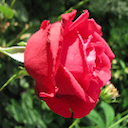

In [85]:
Image.open(image_path)

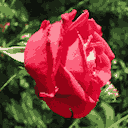

In [86]:
Image.open('out.png')

In [87]:
compressed_size=os.path.getsize('out.png')
original_size=os.path.getsize(image_path)
compressed_size

12110

In [88]:
original_size

49709

In [89]:
compression_ratio=original_size/compressed_size
compression_ratio

4.104789430222956